# 🤖📢 Real vs. Parody Tweet Detection  
**Natural Language Processing to Unmask Fake Tweets from Public Figures**

---

## 🎯 Project Goals  
To develop a machine learning model capable of distinguishing between real and parody tweets from celebrities with high accuracy, while uncovering linguistic patterns that differentiate them.

---

## 📌 Problem Statement & Context  
In the era of social media, parody accounts frequently mimic the voices of public figures to create humorous or satirical content. While often entertaining, these tweets can confuse the public if their fake origin isn't clear.

---

## ❓ Why Is This Important?  
📱 Social media is a primary source of news, opinion, and public discourse.  
🎭 Parody accounts may generate bias, misinformation, or manipulate public perception.  
🧠 Context-based text detection is a key area in NLP (Natural Language Processing).  
💡 This dataset provides a realistic case study for text classification and stylistic analysis.

---

## 🎯 Objective  
- Train a NLP model to classify tweets as "real" or "fake"  
- Explore linguistic and statistical features of real vs. parody tweets  
- Analyze which public figures are most frequently mimicked and how  
- Build visualizations to help non-experts understand the differences

---

## 👥 Target Audience  
🧑‍🎓 Data Science & NLP Enthusiasts – Learn text classification and language analysis.  
📢 Social Media Analysts – Understand patterns in parody content.  
🔍 Fact-checkers – Use as a tool for validating online content.  
📊 Platform Designers & Moderators – AI-powered content integrity features.  

---

## 🧾 Dataset Exploration & Preprocessing  
📦 Dataset: 120 tweets from public figures such as Elon Musk, Billie Eilish, Ryan Reynolds  
📑 Features: `name`, `tweet`, `is_real`  
🧹 Preprocessing:  
- Lowercasing  
- Tokenization  
- Stopword removal  
- Lemmatization  
- Feature engineering: tweet length, punctuation count, capital letter ratio  

---

## 📊 Exploratory Data Analysis (EDA)  
- 🔢 Tweet distribution: Real vs Fake  
- 🗣️ Word frequencies & n-grams by class  
- 📏 Tweet length: Are parody tweets shorter or longer?  
- 💬 Stylistic analysis: sentiment, punctuation, uppercase usage  
- 🧍‍♂️ Who gets parodied the most?  
- 🧠 Word clouds for real and fake tweets  

---

## 🔍 Feature Engineering  
💡 Textual Features:  
- Word Count  
- Average Word Length  
- Exclamation / Question Mark Count  
- Sentiment Score  
- TF-IDF Vectors  

🏷️ Categorical Feature:  
- Name (converted to dummy variables if used)  

---

## 🧠 Modeling Objectives  
🎯 Classification task: Real vs Fake tweets  
Modeling Techniques:  
- Logistic Regression  
- Naive Bayes  
- Support Vector Machine (SVM)  
- Random Forest (optional ensemble method)  

---

## 📈 Evaluation & Metrics  
- Accuracy  
- Precision, Recall, F1-Score  
- Confusion Matrix  
- ROC-AUC Curve  

---

## 🔬 Key Insights  
🔍 Parody tweets are often more expressive or exaggerated in language  
💬 More punctuation used in fake tweets (e.g., !!!, ???)  
📊 Certain celebrities like Billie Eilish are more frequently targeted by parodies  
🧪 Naive Bayes and SVM showed the best performance on this small dataset  
🤯 Even simple models can effectively distinguish stylistic patterns (>80% accuracy)

---

## 🔧 Tools Used  
- Python (Pandas, NumPy, Scikit-learn, NLTK, spaCy)  
- Visualization: Matplotlib, Seaborn, WordCloud  
- NLP: TfidfVectorizer, CountVectorizer, SentimentIntensityAnalyzer  
- Development: Google Colab / Jupyter Notebook  

---

## 📎 Dataset Info  
- Tweets: 120  
- Features: Name, Tweet (text), is_real (label)  
- Source: https://www.kaggle.com/datasets/abaghyangor/celebrity-tweets

---

## 🧑‍💻 Author  
Hilda Adina Rahmi – Data Scientist with a focus on NLP, misinformation detection, and social media text analysis.  
Dedicated to using data science to uncover truth in the digital age.
"""

In [25]:
# 🧠 Load the necessary libraries for Tweet Authenticity Classification

# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# System utilities
import os
import warnings
warnings.filterwarnings("ignore")

# 📥 Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# 🎨 Set visual style for data analysis
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# 📥 Load the dataset
df = pd.read_csv("tweets_dataset.csv")

In [27]:
# Show basic info and first few rows
df_info = df.info()
df_head = df.head()

df_shape = df.shape
df_columns = df.columns.tolist()

df_shape, df_columns, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     120 non-null    object
 1   tweet    120 non-null    object
 2   is_real  120 non-null    bool  
dtypes: bool(1), object(2)
memory usage: 2.1+ KB


((120, 3),
 ['name', 'tweet', 'is_real'],
             name                                              tweet  is_real
 0  Billie Eilish  i’m fine. just floating in a hoodie-shaped clo...    False
 1  Ryan Reynolds  I watched Frozen without my two-year-old this ...     True
 2  Billie Eilish  people really be like “you’ve changed” like th...    False
 3  Billie Eilish  people really be like “you’ve changed” like th...    False
 4      Elon Musk                                         Nuke Mars!     True)

In [28]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

name       0
tweet      0
is_real    0
dtype: int64
                 name       tweet is_real
count             120         120     120
unique              8          35       2
top     Billie Eilish  Nuke Mars!    True
freq               15           8      64


In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv("tweets_dataset.csv")  # Correctly load the DataFrame

# Create df_cleaned from df
df_cleaned = df.copy()

# Add preprocessing functions
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing
df_cleaned["tokens"] = df_cleaned["tweet"].apply(preprocess_tweet)

# Display the cleaned DataFrame
print(df_cleaned)

                   name                                              tweet  \
0         Billie Eilish  i’m fine. just floating in a hoodie-shaped clo...   
1         Ryan Reynolds  I watched Frozen without my two-year-old this ...   
2         Billie Eilish  people really be like “you’ve changed” like th...   
3         Billie Eilish  people really be like “you’ve changed” like th...   
4             Elon Musk                                         Nuke Mars!   
..                  ...                                                ...   
115           Elon Musk                                         Nuke Mars!   
116        Taylor Swift  "It's crazy to think about how many countries ...   
117       Conan O'Brien  "Nothing is more frightening than a clown tell...   
118  Tyler, the Creator  dreamt i opened a jazz bakery and now i’m mad ...   
119       Billie Eilish  people really be like “you’ve changed” like th...   

     is_real                                             tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# Assuming df_cleaned is the DataFrame with the tokens column
df_cleaned["tweet_length"] = df_cleaned["tweet"].apply(len)
df_cleaned["punctuation_count"] = df_cleaned["tweet"].apply(lambda x: sum(1 for c in x if c in string.punctuation))
df_cleaned["capital_ratio"] = df_cleaned["tweet"].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# Display the relevant columns
df_cleaned[["tweet", "tokens", "tweet_length", "punctuation_count", "capital_ratio"]].head()

,tweet,tokens,tweet_length,punctuation_count,capital_ratio
0,i’m fine. just floating in a hoodie-shaped clo...,"[’, fine, floating, hoodieshaped, cloud, exist...",70,3,0.000000
1,I watched Frozen without my two-year-old this ...,"[watched, frozen, without, twoyearold, morning...",92,4,0.032609
2,people really be like “you’ve changed” like th...,"[people, really, like, “, ’, changed, ”, like,...",70,0,0.000000
3,people really be like “you’ve changed” like th...,"[people, really, like, “, ’, changed, ”, like,...",70,0,0.000000
4,Nuke Mars!,"[nuke, mar]",10,1,0.200000


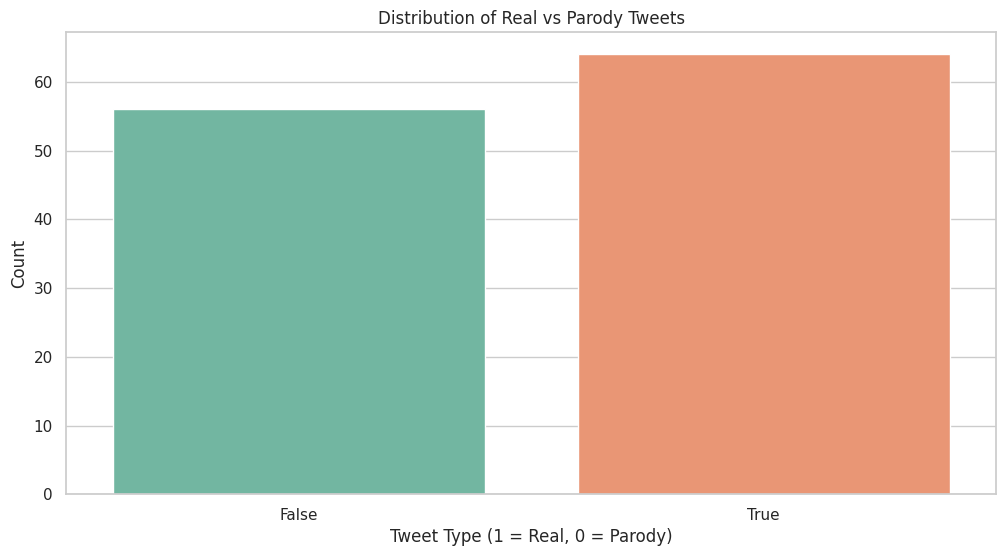

In [31]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 🟦 Plot: Real vs Fake Tweet Distribution
sns.countplot(data=df_cleaned, x="is_real", palette="Set2")
plt.title("Distribution of Real vs Parody Tweets")
plt.xlabel("Tweet Type (1 = Real, 0 = Parody)")
plt.ylabel("Count")
plt.show()

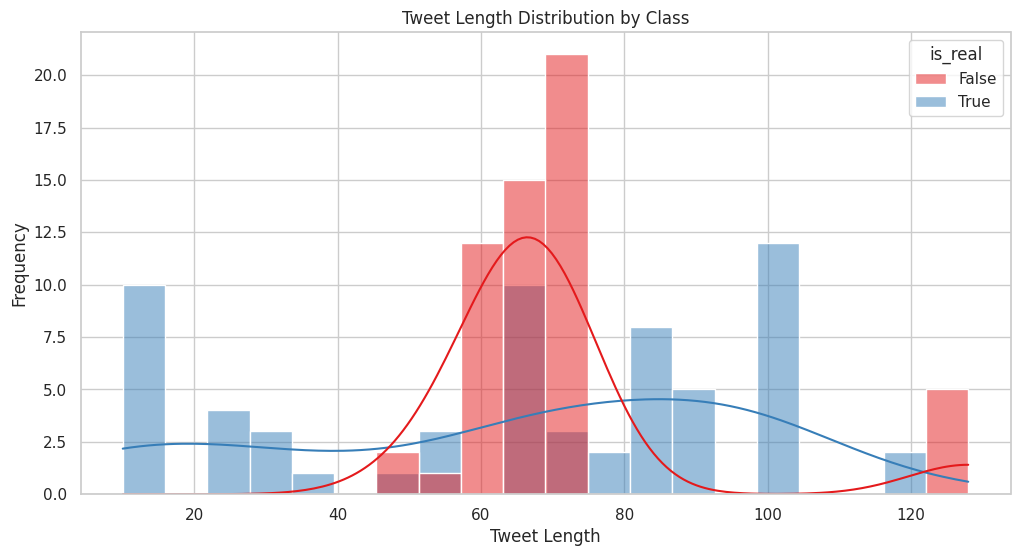

In [32]:
# 🔠 Tweet Length Distribution
sns.histplot(data=df_cleaned, x="tweet_length", hue="is_real", kde=True, bins=20, palette="Set1")
plt.title("Tweet Length Distribution by Class")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

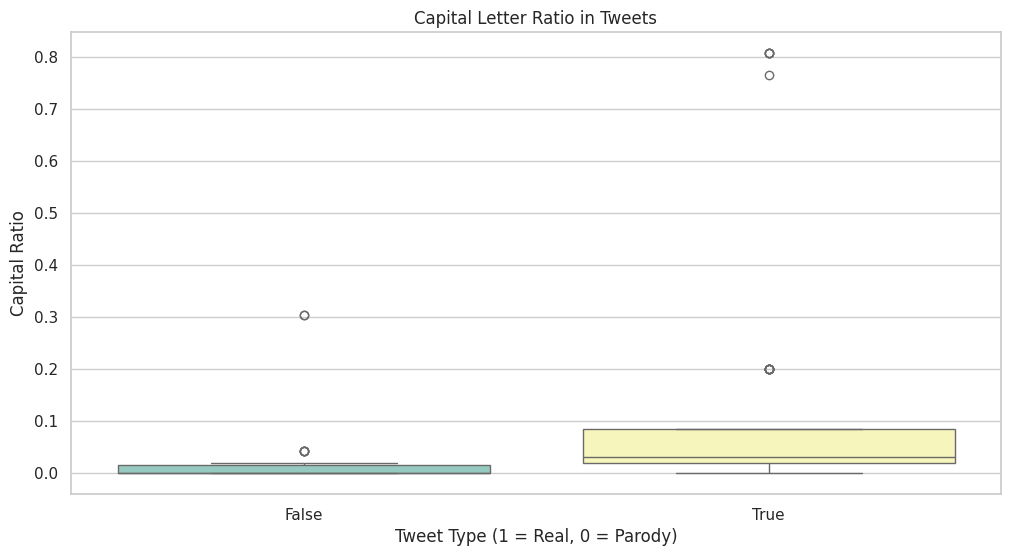

In [33]:
# 🧾 Capital Letter Ratio
sns.boxplot(data=df_cleaned, x="is_real", y="capital_ratio", palette="Set3")
plt.title("Capital Letter Ratio in Tweets")
plt.xlabel("Tweet Type (1 = Real, 0 = Parody)")
plt.ylabel("Capital Ratio")
plt.show()

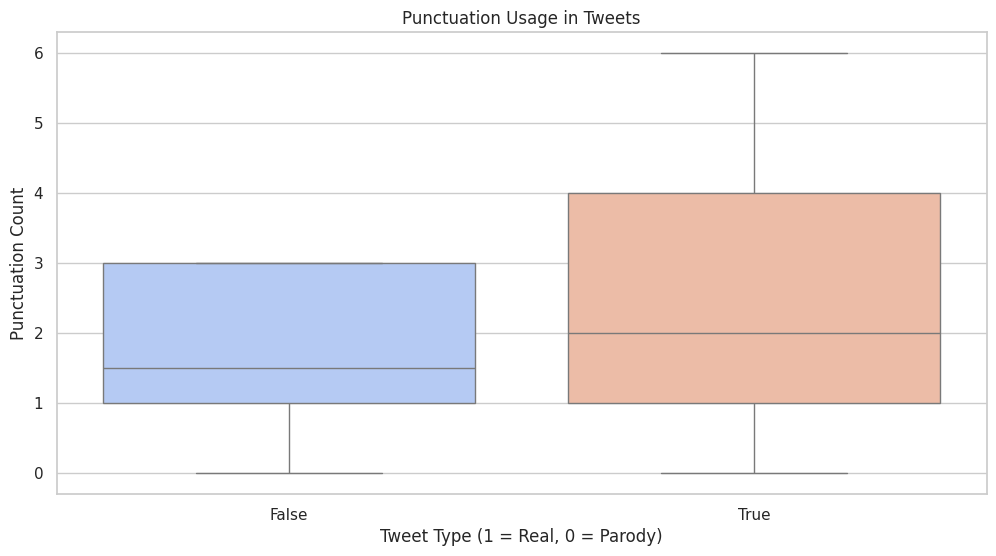

In [34]:
# 📎 Punctuation Count
sns.boxplot(data=df_cleaned, x="is_real", y="punctuation_count", palette="coolwarm")
plt.title("Punctuation Usage in Tweets")
plt.xlabel("Tweet Type (1 = Real, 0 = Parody)")
plt.ylabel("Punctuation Count")
plt.show()

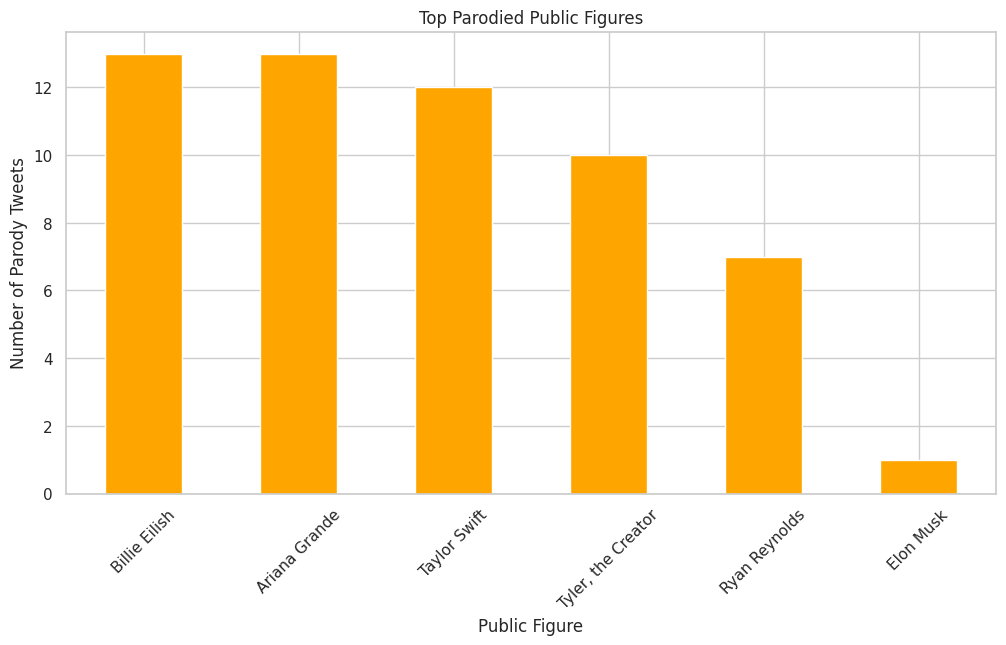

In [35]:
# 🧍‍♂️ Who gets parodied the most?
parody_names = df[df_cleaned["is_real"] == 0]["name"]
top_parodied = parody_names.value_counts()
top_parodied.plot(kind="bar", color="orange")
plt.title("Top Parodied Public Figures")
plt.xlabel("Public Figure")
plt.ylabel("Number of Parody Tweets")
plt.xticks(rotation=45)
plt.show()

🔹 Top 20 Words in Real Tweets:
[('nuke', 8), ('mars', 8), ('love', 8), ('im', 8), ('’', 8), ('time', 7), ('many', 6), ('good', 6), ('need', 6), ('son', 5), ('asked', 5), ('babies', 5), ('come', 5), ('distract', 5), ('said', 5), ('day', 5), ('going', 5), ('die', 5), ('wonder', 5), ('taco', 5)]

🔸 Top 20 Words in Parody Tweets:
[('’', 39), ('like', 20), ('lost', 10), ('floating', 6), ('goose', 6), ('people', 5), ('really', 5), ('“', 5), ('changed', 5), ('”', 5), ('whole', 5), ('point', 5), ('sometimes', 5), ('healing', 5), ('look', 5), ('peace', 5), ('—', 5), ('looks', 5), ('late', 5), ('nights', 5)]


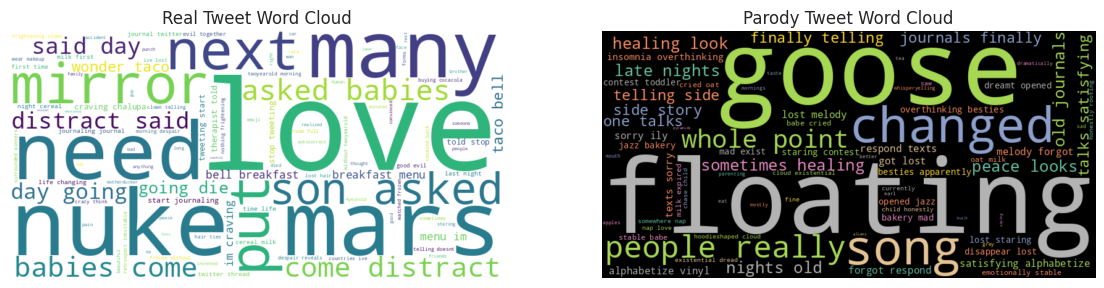

In [36]:
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt  # Make sure to import matplotlib for plotting

# Preparation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Simple tokenization (for visualization)
def tokenize(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in punctuation])
    tokens = nltk.word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

df["tokens"] = df["tweet"].apply(tokenize)

# Combine words from real and parody tweets
real_words = [word for tokens in df[df["is_real"] == 1]["tokens"] for word in tokens]
fake_words = [word for tokens in df[df["is_real"] == 0]["tokens"] for word in tokens]

# Display the 20 most common words
print("🔹 Top 20 Words in Real Tweets:")
print(Counter(real_words).most_common(20))
print("\n🔸 Top 20 Words in Parody Tweets:")
print(Counter(fake_words).most_common(20))

# WordCloud
real_wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_words))
fake_wc = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(' '.join(fake_words))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(real_wc, interpolation="bilinear")
plt.title("Real Tweet Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(fake_wc, interpolation="bilinear")
plt.title("Parody Tweet Word Cloud")
plt.axis("off")
plt.show()

In [37]:
import numpy as np
import re
from textblob import TextBlob

# Word count
df["word_count"] = df["tweet"].apply(lambda x: len(x.split()))

# Average word length
df["avg_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0)

# Punctuation features
df["exclamation_count"] = df["tweet"].apply(lambda x: x.count("!"))
df["question_count"] = df["tweet"].apply(lambda x: x.count("?"))

# Sentiment polarity using TextBlob
df["sentiment"] = df["tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorical: Name to dummy variables
df = pd.get_dummies(df, columns=["name"], drop_first=True)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df["tweet"])

# Combine with engineered features
engineered_features = df[["word_count", "avg_word_len", "exclamation_count", "question_count", "sentiment"] + [col for col in df.columns if col.startswith("name_")]]

# Convert boolean columns to integers
for col in engineered_features.columns:
    if engineered_features[col].dtype == 'bool':
        engineered_features[col] = engineered_features[col].astype(int)

# Check data types after conversion
print(engineered_features.dtypes)

# Combine features
X_full = hstack([tfidf_matrix, engineered_features])
y = df["is_real"]

word_count                   int64
avg_word_len               float64
exclamation_count            int64
question_count               int64
sentiment                  float64
name_Billie Eilish           int64
name_Conan O'Brien           int64
name_Elon Musk               int64
name_Kanye West              int64
name_Ryan Reynolds           int64
name_Taylor Swift            int64
name_Tyler, the Creator      int64
dtype: object


In [39]:
import numpy as np

# Convert sparse matrix to dense (if feasible)
X_dense = X_full.toarray()

# Check for negative values
if np.min(X_dense) < 0:
    print("Negative values found in X_full.")
else:
    print("No negative values in X_full.")

Negative values found in X_full.


In [40]:
# Example: Ensure all engineered features are non-negative
engineered_features = df[["word_count", "avg_word_len", "exclamation_count", "question_count", "sentiment"] + [col for col in df.columns if col.startswith("name_")]]

# Convert boolean columns to integers
for col in engineered_features.columns:
    if engineered_features[col].dtype == 'bool':
        engineered_features[col] = engineered_features[col].astype(int)

# Ensure non-negative values (example transformation)
engineered_features = engineered_features.clip(lower=0)  # Set negative values to 0

# Combine features again
X_full = hstack([tfidf_matrix, engineered_features])


🔍 Logistic Regression
              precision    recall  f1-score   support

       False       0.90      1.00      0.95         9
        True       1.00      0.93      0.97        15

    accuracy                           0.96        24
   macro avg       0.95      0.97      0.96        24
weighted avg       0.96      0.96      0.96        24

Accuracy: 0.9583333333333334


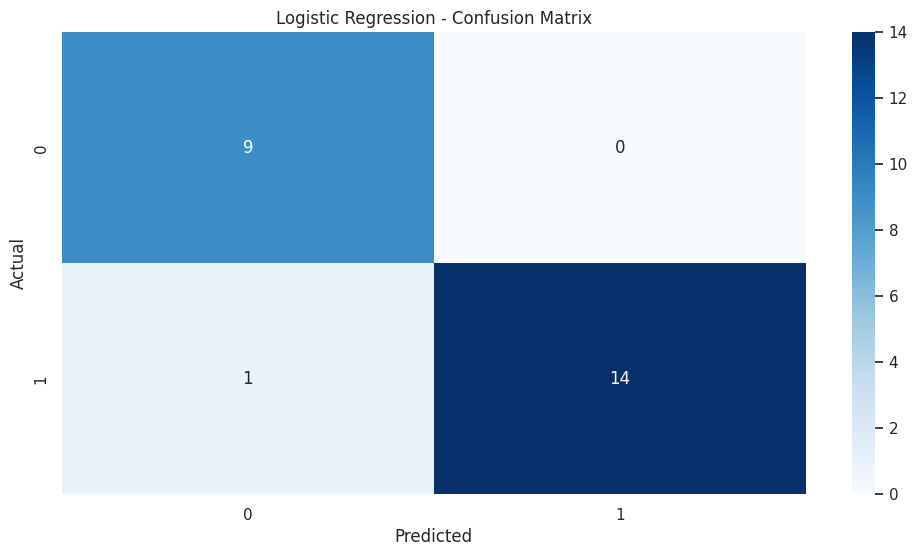


🔍 Naive Bayes
              precision    recall  f1-score   support

       False       0.75      1.00      0.86         9
        True       1.00      0.80      0.89        15

    accuracy                           0.88        24
   macro avg       0.88      0.90      0.87        24
weighted avg       0.91      0.88      0.88        24

Accuracy: 0.875


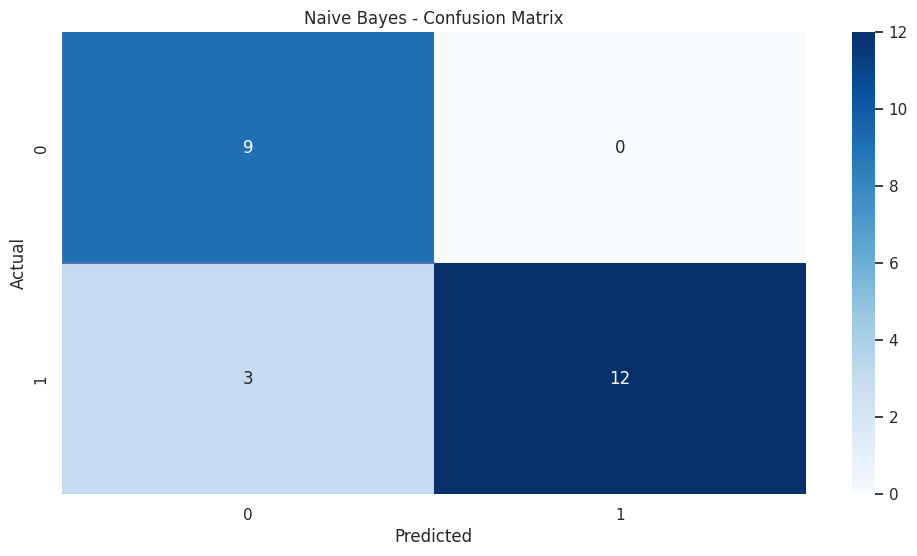


🔍 SVM
              precision    recall  f1-score   support

       False       0.47      1.00      0.64         9
        True       1.00      0.33      0.50        15

    accuracy                           0.58        24
   macro avg       0.74      0.67      0.57        24
weighted avg       0.80      0.58      0.55        24

Accuracy: 0.5833333333333334


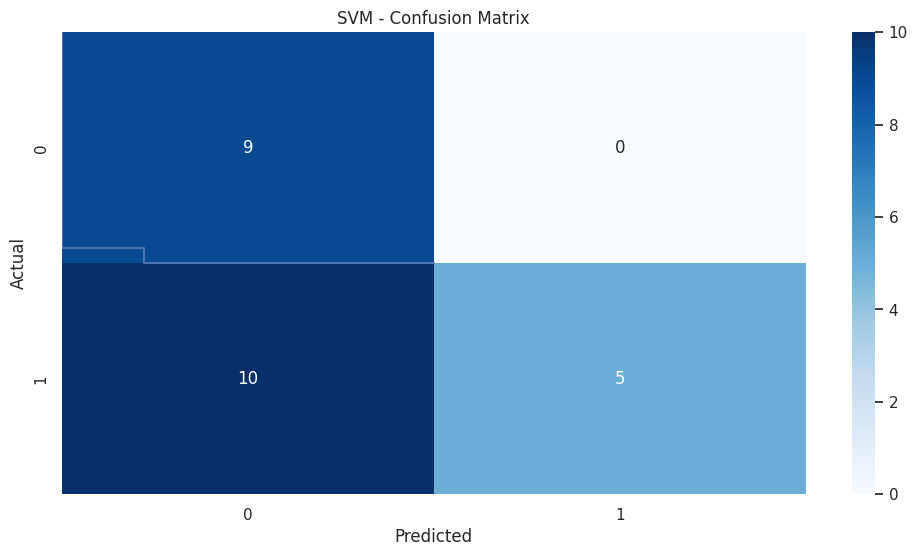


🔍 Random Forest
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         9
        True       1.00      1.00      1.00        15

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Accuracy: 1.0


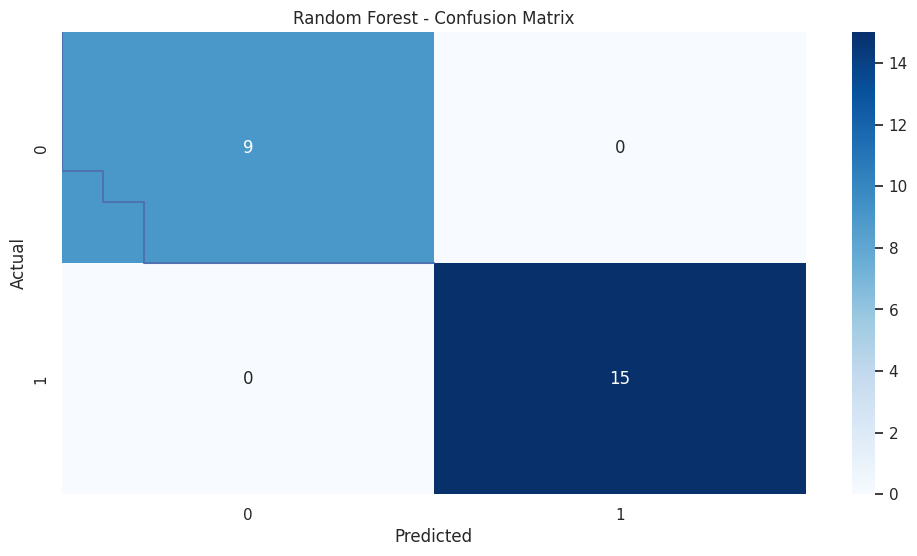

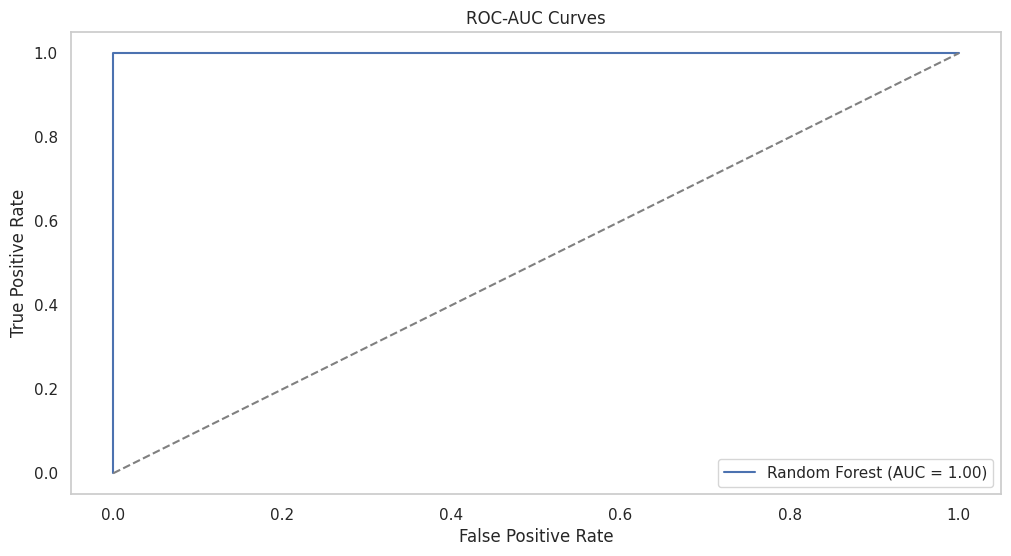

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC-AUC curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.title("ROC-AUC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

logreg = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy: 0.968421052631579


In [43]:
from sklearn.svm import SVC

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm = SVC(probability=True)
svm_grid = GridSearchCV(svm, svm_param_grid, cv=cv, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("Best SVM Params:", svm_grid.best_params_)

Best SVM Params: {'C': 1, 'kernel': 'linear'}


Total feature names: 197
Total features in X_test: 197


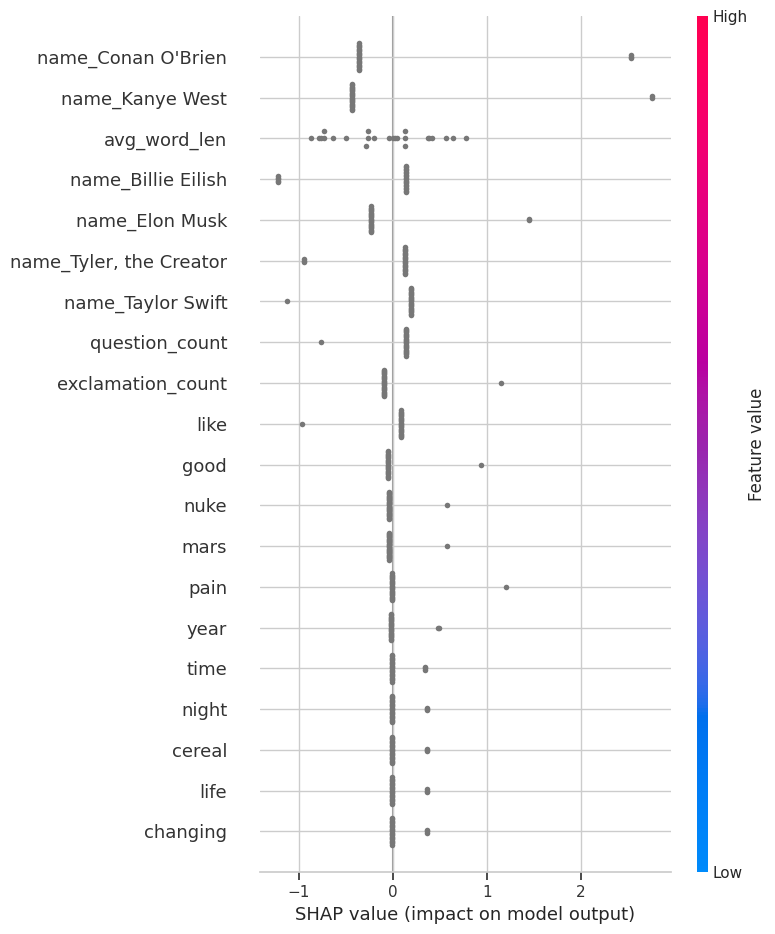

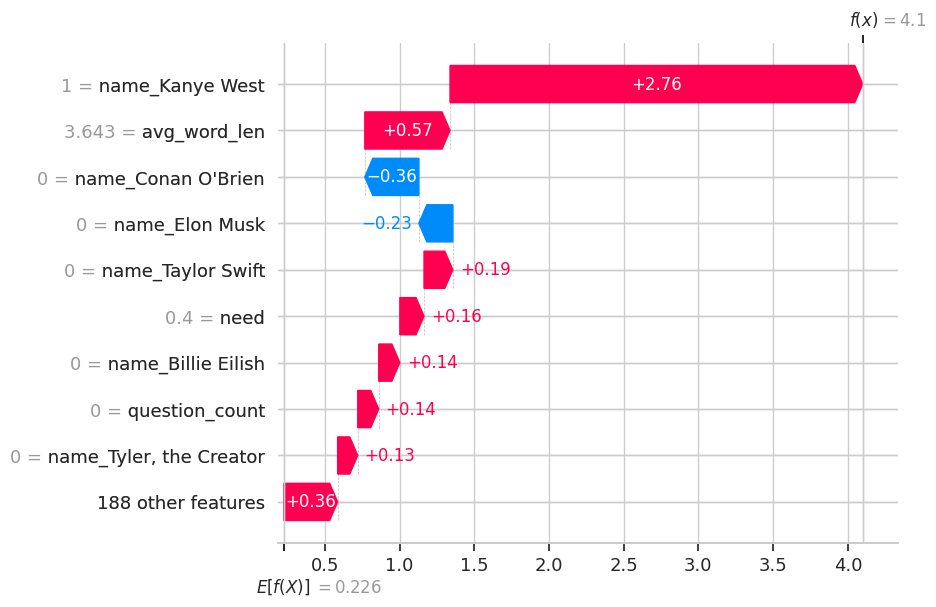

In [46]:
tfidf_feature_names = vectorizer.get_feature_names_out().tolist()

engineered_feature_names = engineered_features.columns.tolist()

all_feature_names = tfidf_feature_names + engineered_feature_names

print("Total feature names:", len(all_feature_names))
print("Total features in X_test:", X_test.shape[1])

shap.summary_plot(
    shap_values,
    features=X_test,
    feature_names=all_feature_names
)

shap.plots.waterfall(shap.Explanation(values=shap_values[5],
                                      base_values=explainer.expected_value,
                                      data=X_test[5].toarray()[0],
                                      feature_names=all_feature_names))

In [49]:
import joblib

joblib.dump(grid_search.best_estimator_, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(engineered_features.columns.tolist(), "engineered_features.pkl")

['engineered_features.pkl']

In [53]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [58]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import shap

from textblob import TextBlob
import string
import re

# Load model dan vectorizer
model = joblib.load("model.pkl")
vectorizer = joblib.load("vectorizer.pkl")
engineered_feature_names = joblib.load("engineered_features.pkl")

# Fitur engineering fungsi
def extract_features(tweet):
    word_count = len(tweet.split())
    avg_word_len = np.mean([len(w) for w in tweet.split()]) if word_count > 0 else 0
    exclamation_count = tweet.count("!")
    question_count = tweet.count("?")
    sentiment = TextBlob(tweet).sentiment.polarity
    return [word_count, avg_word_len, exclamation_count, question_count, sentiment]

# UI
st.title("🔍 Real vs. Parody Tweet Classifier")
st.write("Masukkan tweet dari figur publik, dan kami prediksi apakah ini asli atau parodi.")

user_input = st.text_area("Masukkan tweet di sini:")

if user_input:
    # Ekstrak fitur
    tfidf_features = vectorizer.transform([user_input])
    engineered = np.array(extract_features(user_input)).reshape(1, -1)
    from scipy.sparse import hstack
    final_input = hstack([tfidf_features, engineered])

    # Prediksi
    pred = model.predict(final_input)[0]
    proba = model.predict_proba(final_input)[0][1]

    st.markdown(f"### 🧠 Prediksi: {'🟢 Real' if pred else '🔴 Parody'}")
    st.markdown(f"**Confidence:** {proba:.2f}")

    # SHAP interpretasi
    explainer = shap.LinearExplainer(model, final_input, feature_perturbation="interventional")
    shap_values = explainer.shap_values(final_input)

    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.markdown("#### 🔎 Interpretasi SHAP:")
    shap.summary_plot(shap_values, final_input, feature_names=vectorizer.get_feature_names_out().tolist() + engineered_feature_names)
    st.pyplot(bbox_inches='tight')

2025-05-18 04:08:27.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 04:08:27.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 04:08:27.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 04:08:27.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 04:08:27.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 04:08:27.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 04:08:27.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 04:08:27.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar